![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

# 04 | Overfitting & Hyperparameter Tuning with Cross Validation

## Chapter Importance

We have already covered:

1. Regression Models
2. Classification Models
3. Train Test Split for Model Selection

In short, we have computed all possible types of models to predict numerical and categorical variables with Regression and Classification models, respectively.

Although it is not enough with computing one model, we need to compare different models to choose the one whose predictions are close to reality.

Nevertheless, we cannot evaluate the model on the same data we used to `.fit()` (train) the mathematical equation (model). We need to separate the data into train and test sets; the first to train the model, the later to evaluate the model.

No we add an extra layer of complexity because we can improve a model (an algorithm) by configuring its parameters. This chapter is all about **computing different combinations of a single model's hyperparameters** to get the best.

## [ ] Load the [Data](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)

- The goal of this dataset is
- To predict if **bank's customers** (rows) `default` next month
- Based on their **socio-demographical characteristics** (columns)

In [3]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df_credit = pd.read_excel(io=url, header=1, index_col=0)
df_credit.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
7220,160000,2,2,1,26,-1,-1,-1,-1,-1,-1,1319,3934,399,690,590,0,3941,399,690,590,0,1926,1
14132,60000,1,2,2,53,0,0,0,0,0,0,56765,57849,57432,27126,27579,29085,3000,4000,2000,2000,2000,2000,0
12543,150000,2,2,2,29,0,0,0,0,0,-1,19020,7717,9858,9188,7518,23574,1500,5000,2000,1000,33054,704,0
14975,80000,1,1,2,31,-1,-1,0,0,0,0,17873,65585,64047,48107,48620,45280,65592,2051,2002,2013,2004,2000,0
10189,360000,1,3,1,41,-1,-1,-1,-1,-1,-1,498,498,498,498,498,498,498,498,498,498,498,498,1
21684,20000,2,2,2,22,0,0,0,0,0,0,16653,18062,18374,19222,18014,18627,2000,1700,1500,1000,1000,1000,0
3500,260000,2,2,1,34,-2,-2,-2,-2,-2,-2,8214,2149,3065,750,0,0,2151,3065,750,0,0,377,1
9397,30000,2,1,2,23,1,3,2,2,2,2,12271,11791,11305,12216,12374,12026,0,0,1100,500,0,445,0
25849,230000,2,2,1,35,0,0,0,0,0,0,160560,158782,150844,151623,148261,153161,10012,10010,10000,7000,10000,10000,0


## Preprocess the Data

### Missing Data

In [4]:
df_credit.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### Dummy Variables

In [5]:
df_credit= pd.get_dummies(data=df_credit,drop_first=True)
df_credit

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1


## Feature Selection

In [6]:
y = df_credit.iloc[:,-1]

In [7]:
X =df_credit.iloc[:,:-1]

## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test, y_train,y_test = train_test_split(X, y,test_size=0.30,random_state=42)

## [ ] `DecisionTreeClassifier()` with Default Hyperparameters

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
model_d = DecisionTreeClassifier()

In [14]:
model_d.fit(X_train,y_train)

DecisionTreeClassifier()

### Accuracy

#### In `train` data

In [15]:
model_d.score(X_train, y_train)

0.9995238095238095

#### In `test` data

In [16]:
model_d.score(X_test,y_test)

0.7322222222222222

### Model Visualization

### import plot_tree from sklearn

In [17]:
from sklearn.tree import plot_tree

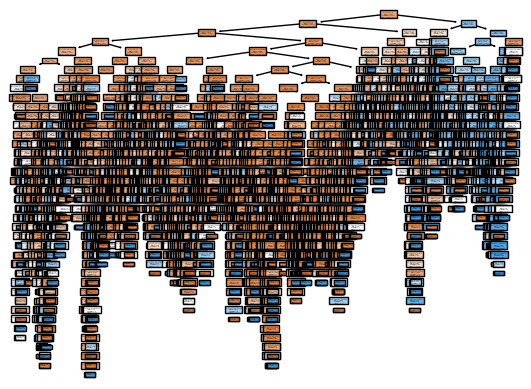

In [18]:
plot_tree(decision_tree=model_d, feature_names=X_train.columns ,filled= True);

## `DecisionTreeClassifier()` with Custom Hyperparameters

In [19]:
model_d= DecisionTreeClassifier()

In [20]:
model_d.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### 1st Configuration

In [21]:
model_d =DecisionTreeClassifier(max_depth= 2 ,min_samples_leaf=150)

#### Accuracy

##### In `train` data

In [22]:
model_d.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=150)

In [23]:
model_d.score(X_train,y_train)

0.8194285714285714

##### In `test` data

In [24]:
model_d.score(X_test, y_test)

0.82

#### Model Visualization

[Text(0.5, 0.8333333333333334, 'PAY_0 <= 1.5\ngini = 0.346\nsamples = 21000\nvalue = [16324, 4676]'),
 Text(0.25, 0.5, 'PAY_2 <= 1.5\ngini = 0.277\nsamples = 18780\nvalue = [15656, 3124]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.245\nsamples = 17198\nvalue = [14744, 2454]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.488\nsamples = 1582\nvalue = [912, 670]'),
 Text(0.75, 0.5, 'PAY_5 <= 1.0\ngini = 0.421\nsamples = 2220\nvalue = [668, 1552]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.457\nsamples = 1292\nvalue = [456, 836]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.353\nsamples = 928\nvalue = [212, 716]')]

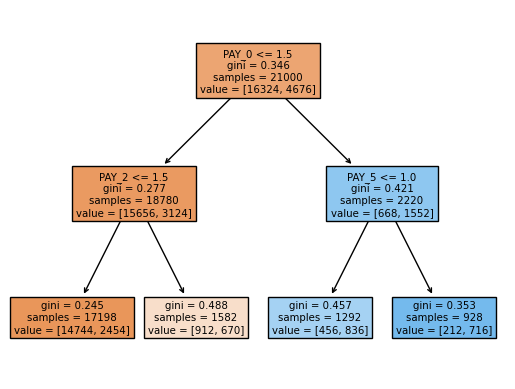

In [25]:
plot_tree (decision_tree= model_d,feature_names=X_train.columns, filled=True)

[](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F4756451%2F5724f9841b58cbd7838a851ac6df659b%2Frpqa6.jpg?generation=1608831884903054&alt=media)

### [ ] 2nd Configuration

In [26]:
model_d =DecisionTreeClassifier(max_depth=3)

In [27]:
model_d.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
DecisionTreeClassifier(max_depth=3)

DecisionTreeClassifier(max_depth=3)

#### Accuracy

##### In `train` data

In [29]:
model_d.score(X_train,y_train)

0.8215238095238095

##### In `test` data

In [30]:
model_d.score(X_test,y_test)

0.8206666666666667

#### Model Visualization

[Text(0.5, 0.875, 'PAY_0 <= 1.5\ngini = 0.346\nsamples = 21000\nvalue = [16324, 4676]'),
 Text(0.25, 0.625, 'PAY_2 <= 1.5\ngini = 0.277\nsamples = 18780\nvalue = [15656, 3124]'),
 Text(0.125, 0.375, 'PAY_AMT3 <= 573.5\ngini = 0.245\nsamples = 17198\nvalue = [14744, 2454]'),
 Text(0.0625, 0.125, 'gini = 0.341\nsamples = 4550\nvalue = [3556, 994]'),
 Text(0.1875, 0.125, 'gini = 0.204\nsamples = 12648\nvalue = [11188, 1460]'),
 Text(0.375, 0.375, 'PAY_3 <= 1.0\ngini = 0.488\nsamples = 1582\nvalue = [912, 670]'),
 Text(0.3125, 0.125, 'gini = 0.456\nsamples = 750\nvalue = [486, 264]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 832\nvalue = [426, 406]'),
 Text(0.75, 0.625, 'PAY_3 <= -0.5\ngini = 0.421\nsamples = 2220\nvalue = [668, 1552]'),
 Text(0.625, 0.375, 'BILL_AMT1 <= 2325.0\ngini = 0.493\nsamples = 136\nvalue = [76, 60]'),
 Text(0.5625, 0.125, 'gini = 0.433\nsamples = 85\nvalue = [58, 27]'),
 Text(0.6875, 0.125, 'gini = 0.457\nsamples = 51\nvalue = [18, 33]'),
 Text(0.875, 0.375, 'E

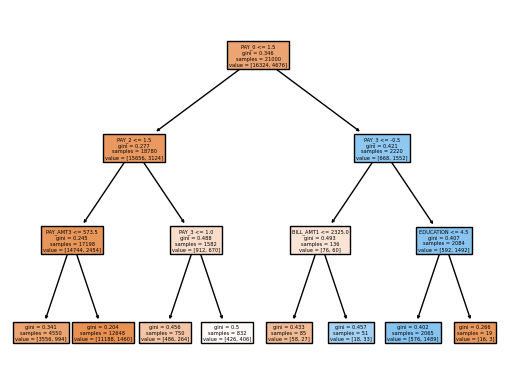

In [31]:
plot_tree(decision_tree=model_d,feature_names=X_train.columns, filled=True)

### 3rd Configuration

In [32]:
model_d =DecisionTreeClassifier(max_depth=4)

In [33]:
model_d.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [34]:
DecisionTreeClassifier(max_depth=4)

DecisionTreeClassifier(max_depth=4)

In [35]:
model_d.score(X_train,y_train)

0.8236666666666667

In [36]:
model_d.score(X_test,y_test)

0.8192222222222222

[Text(0.5, 0.9, 'PAY_0 <= 1.5\ngini = 0.346\nsamples = 21000\nvalue = [16324, 4676]'),
 Text(0.25, 0.7, 'PAY_2 <= 1.5\ngini = 0.277\nsamples = 18780\nvalue = [15656, 3124]'),
 Text(0.125, 0.5, 'PAY_AMT3 <= 573.5\ngini = 0.245\nsamples = 17198\nvalue = [14744, 2454]'),
 Text(0.0625, 0.3, 'BILL_AMT1 <= 470.5\ngini = 0.341\nsamples = 4550\nvalue = [3556, 994]'),
 Text(0.03125, 0.1, 'gini = 0.405\nsamples = 1794\nvalue = [1289, 505]'),
 Text(0.09375, 0.1, 'gini = 0.292\nsamples = 2756\nvalue = [2267, 489]'),
 Text(0.1875, 0.3, 'PAY_4 <= 1.5\ngini = 0.204\nsamples = 12648\nvalue = [11188, 1460]'),
 Text(0.15625, 0.1, 'gini = 0.196\nsamples = 12401\nvalue = [11033, 1368]'),
 Text(0.21875, 0.1, 'gini = 0.467\nsamples = 247\nvalue = [155, 92]'),
 Text(0.375, 0.5, 'PAY_3 <= 1.0\ngini = 0.488\nsamples = 1582\nvalue = [912, 670]'),
 Text(0.3125, 0.3, 'PAY_AMT2 <= 2242.5\ngini = 0.456\nsamples = 750\nvalue = [486, 264]'),
 Text(0.28125, 0.1, 'gini = 0.485\nsamples = 445\nvalue = [261, 184]'),
 Tex

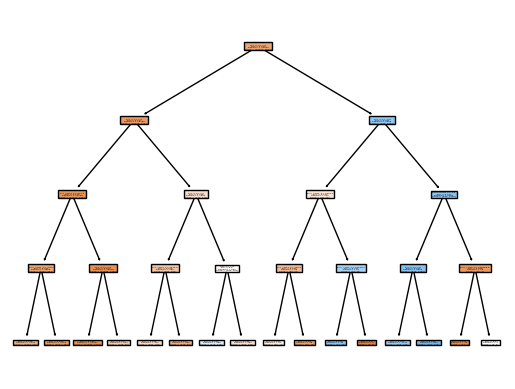

In [38]:
plot_tree(decision_tree=model_d,feature_names=X_train.columns, filled=True)

### 4th Configuration

In [39]:
model_d =DecisionTreeClassifier(min_samples_leaf=100)

In [40]:
model_d.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=100)

In [41]:
model_d.score(X_train,y_train)

0.8244285714285714

In [42]:
model_d.score(X_test,y_test)

0.8176666666666667

In [43]:
DecisionTreeClassifier(min_samples_leaf=100)

DecisionTreeClassifier(min_samples_leaf=100)

[Text(0.7460988205192212, 0.975, 'PAY_0 <= 1.5\ngini = 0.346\nsamples = 21000\nvalue = [16324, 4676]'),
 Text(0.5664862081877184, 0.925, 'PAY_2 <= 1.5\ngini = 0.277\nsamples = 18780\nvalue = [15656, 3124]'),
 Text(0.3518441088367449, 0.875, 'PAY_AMT3 <= 573.5\ngini = 0.245\nsamples = 17198\nvalue = [14744, 2454]'),
 Text(0.12141787319021467, 0.825, 'BILL_AMT1 <= 470.5\ngini = 0.341\nsamples = 4550\nvalue = [3556, 994]'),
 Text(0.06390414378432352, 0.775, 'PAY_AMT6 <= 1008.0\ngini = 0.405\nsamples = 1794\nvalue = [1289, 505]'),
 Text(0.044732900649026464, 0.725, 'AGE <= 35.5\ngini = 0.421\nsamples = 1502\nvalue = [1050, 452]'),
 Text(0.025561657513729404, 0.675, 'PAY_AMT3 <= 126.0\ngini = 0.377\nsamples = 758\nvalue = [567, 191]'),
 Text(0.019171243135297056, 0.625, 'LIMIT_BAL <= 285000.0\ngini = 0.391\nsamples = 623\nvalue = [457, 166]'),
 Text(0.012780828756864702, 0.575, 'PAY_0 <= -1.5\ngini = 0.375\nsamples = 504\nvalue = [378, 126]'),
 Text(0.006390414378432351, 0.525, 'gini = 0.29

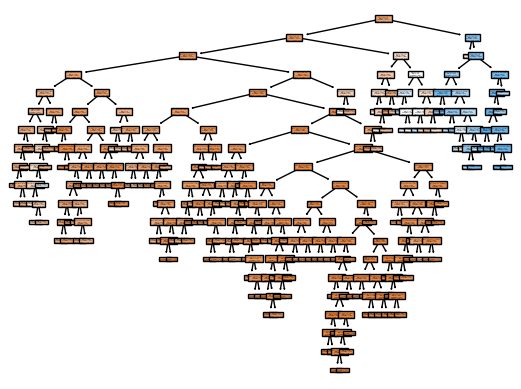

In [44]:
plot_tree(decision_tree=model_d,feature_names=X_train.columns,filled=True)

### 5th Configuration

In [45]:
model_d= DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

In [46]:
model_d.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

In [47]:
DecisionTreeClassifier(max_depth=7,min_samples_leaf=100)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

In [48]:
model_d.score(X_train,y_train)

0.8241428571428572

In [49]:
model_d.score(X_test,y_test)

0.8187777777777778

[Text(0.6628676470588235, 0.9375, 'PAY_0 <= 1.5\ngini = 0.346\nsamples = 21000\nvalue = [16324, 4676]'),
 Text(0.45073529411764707, 0.8125, 'PAY_2 <= 1.5\ngini = 0.277\nsamples = 18780\nvalue = [15656, 3124]'),
 Text(0.2926470588235294, 0.6875, 'PAY_AMT3 <= 573.5\ngini = 0.245\nsamples = 17198\nvalue = [14744, 2454]'),
 Text(0.14411764705882352, 0.5625, 'BILL_AMT1 <= 470.5\ngini = 0.341\nsamples = 4550\nvalue = [3556, 994]'),
 Text(0.07647058823529412, 0.4375, 'PAY_AMT6 <= 1008.0\ngini = 0.405\nsamples = 1794\nvalue = [1289, 505]'),
 Text(0.047058823529411764, 0.3125, 'AGE <= 35.5\ngini = 0.421\nsamples = 1502\nvalue = [1050, 452]'),
 Text(0.023529411764705882, 0.1875, 'PAY_AMT3 <= 126.0\ngini = 0.377\nsamples = 758\nvalue = [567, 191]'),
 Text(0.011764705882352941, 0.0625, 'gini = 0.391\nsamples = 623\nvalue = [457, 166]'),
 Text(0.03529411764705882, 0.0625, 'gini = 0.302\nsamples = 135\nvalue = [110, 25]'),
 Text(0.07058823529411765, 0.1875, 'PAY_AMT1 <= 779.5\ngini = 0.455\nsamples 

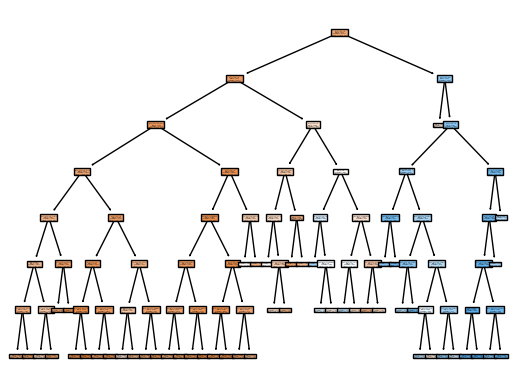

In [50]:
plot_tree(decision_tree=model_d,feature_names=X_train.columns, filled=True)

## [ ] `GridSearchCV()` to find Best Hyperparameters

<img src="src/grid_search_cross_validation.png" style="margin-top: 100px"/>

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
model_d =DecisionTreeClassifier()

In [53]:
model_d.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [54]:
param_grid= {'max_depth':[None,1,2,4,5,10],
            'min_samples_leaf':[1,50,100,200,400,800,1600],
            'criterion':['gini', 'entropy']}

In [57]:
cv_d =GridSearchCV(estimator= model_d, param_grid=param_grid ,cv=5 , verbose=1)

In [62]:
cv_d.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] END .criterion=gini, max_depth=None, min_samples_leaf=1; total time=   1.9s
[CV] END .criterion=gini, max_depth=None, min_samples_leaf=1; total time=   1.2s
[CV] END .criterion=gini, max_depth=None, min_samples_leaf=1; total time=   1.1s
[CV] END .criterion=gini, max_depth=None, min_samples_leaf=1; total time=   1.2s
[CV] END .criterion=gini, max_depth=None, min_samples_leaf=1; total time=   1.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=50; total time=   0.7s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=50; total time=   0.7s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=50; total time=   0.7s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=50; total time=   0.7s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=50; total time=   0.8s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=100; total time=   0.6s
[CV] END criterion=gini, max_depth=None, min_s

[CV] END .criterion=gini, max_depth=2, min_samples_leaf=1600; total time=   0.1s
[CV] END .criterion=gini, max_depth=2, min_samples_leaf=1600; total time=   0.1s
[CV] END .criterion=gini, max_depth=2, min_samples_leaf=1600; total time=   0.1s
[CV] END .criterion=gini, max_depth=2, min_samples_leaf=1600; total time=   0.1s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=1; total time=   0.3s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=1; total time=   0.2s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=1; total time=   0.2s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=1; total time=   0.3s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=1; total time=   0.3s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=50; total time=   0.3s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=50; total time=   0.2s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=50; total time=   0.2s
[CV] END ...criterion=gini, 

[CV] END .criterion=gini, max_depth=10, min_samples_leaf=800; total time=   0.3s
[CV] END .criterion=gini, max_depth=10, min_samples_leaf=800; total time=   0.4s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1600; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1600; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1600; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1600; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1600; total time=   0.2s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1; total time=   2.6s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1; total time=   2.6s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1; total time=   2.4s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1; total time=   2.7s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1; total time=   2.7s
[CV] END criterion

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=400; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=400; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=800; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=800; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=800; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=800; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=800; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1600; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1600; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1600; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1600; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1600; total time=   0.2s
[CV] END .c

[CV] END criterion=entropy, max_depth=10, min_samples_leaf=200; total time=   0.9s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=200; total time=   1.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=400; total time=   0.8s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=400; total time=   0.7s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=400; total time=   0.8s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=400; total time=   0.8s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=400; total time=   0.8s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=800; total time=   0.6s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=800; total time=   0.6s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=800; total time=   0.6s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=800; total time=   0.6s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=800; total time=   0.6s
[CV]

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 4, 5, 10],
                         'min_samples_leaf': [1, 50, 100, 200, 400, 800, 1600]},
             verbose=2)

In [63]:
GridSearchCV(cv=5 , estimator = DecisionTreeClassifier(), param_grid= {'max_depth':[None,1,2,4,5,10],
            'min_samples_leaf':[1,50,100,200,400,800,1600],
            'criterion':['gini', 'entropy']},verbose=1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 4, 5, 10],
                         'min_samples_leaf': [1, 50, 100, 200, 400, 800, 1600]},
             verbose=1)

In [64]:
cv_d =GridSearchCV(estimator= model_d, param_grid=param_grid, cv=5, verbose=2)

In [65]:
cv_d.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] END .criterion=gini, max_depth=None, min_samples_leaf=1; total time=   1.5s
[CV] END .criterion=gini, max_depth=None, min_samples_leaf=1; total time=   1.4s
[CV] END .criterion=gini, max_depth=None, min_samples_leaf=1; total time=   1.3s
[CV] END .criterion=gini, max_depth=None, min_samples_leaf=1; total time=   1.4s
[CV] END .criterion=gini, max_depth=None, min_samples_leaf=1; total time=   1.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=50; total time=   0.8s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=50; total time=   0.8s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=50; total time=   0.8s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=50; total time=   0.8s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=50; total time=   0.8s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=100; total time=   0.6s
[CV] END criterion=gini, max_depth=None, min_s

[CV] END .criterion=gini, max_depth=2, min_samples_leaf=1600; total time=   0.1s
[CV] END .criterion=gini, max_depth=2, min_samples_leaf=1600; total time=   0.1s
[CV] END .criterion=gini, max_depth=2, min_samples_leaf=1600; total time=   0.2s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=1; total time=   0.3s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=1; total time=   0.2s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=1; total time=   0.2s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=1; total time=   0.2s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=1; total time=   0.2s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=50; total time=   0.2s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=50; total time=   0.2s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=50; total time=   0.2s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=50; total time=   0.2s
[CV] END ...criterion=gini, 

[CV] END .criterion=gini, max_depth=10, min_samples_leaf=800; total time=   0.3s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1600; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1600; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1600; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1600; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1600; total time=   0.2s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1; total time=   2.5s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1; total time=   2.7s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1; total time=   2.5s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1; total time=   2.7s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1; total time=   2.7s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=50; total time=   1.5s
[CV] END criter

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=400; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=800; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=800; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=800; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=800; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=800; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1600; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1600; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1600; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1600; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1600; total time=   0.2s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=1; total time=   0.4s
[CV] END .cr

[CV] END criterion=entropy, max_depth=10, min_samples_leaf=200; total time=   1.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=400; total time=   0.8s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=400; total time=   0.7s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=400; total time=   0.7s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=400; total time=   0.8s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=400; total time=   0.8s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=800; total time=   0.6s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=800; total time=   0.6s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=800; total time=   0.6s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=800; total time=   0.6s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=800; total time=   0.6s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1600; total time=   0.4s
[CV

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 4, 5, 10],
                         'min_samples_leaf': [1, 50, 100, 200, 400, 800, 1600]},
             verbose=2)

In [66]:
cv_d.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1}

In [67]:
DecisionTreeClassifier(criterion = 'entropy', max_depth =5 , min_samples_leaf=100)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100)

In [68]:
cv_d.score(X_train, y_train)

0.8236666666666667

In [69]:
cv_d.score(X_test, y_test)

0.8192222222222222

In [70]:
df_credit1 =pd.DataFrame(cv_d.cv_results_)

In [71]:
df_credit1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.472697,0.068683,0.012502,0.006251,gini,None,1,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.738333,0.730476,0.720714,0.731905,0.719524,0.728190,0.007112,84
1,0.884507,0.033524,0.012499,0.006250,gini,None,50,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.820714,0.817143,0.810714,0.810476,0.809048,0.813619,0.004516,80
2,0.772240,0.030101,0.003125,0.006251,gini,None,100,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.825714,0.822381,0.820238,0.815952,0.813333,0.819524,0.004429,13
3,0.638917,0.031368,0.006250,0.007655,gini,None,200,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.826429,0.818810,0.818333,0.815952,0.814286,0.818762,0.004169,60
4,0.513317,0.010968,0.009376,0.007656,gini,None,400,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.827857,0.818333,0.817857,0.813810,0.814286,0.818429,0.005054,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,1.195245,0.027175,0.009375,0.007655,entropy,10,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.825714,0.822381,0.819286,0.817143,0.810952,0.819095,0.004995,57
80,1.033243,0.016794,0.006251,0.007655,entropy,10,200,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.826429,0.818810,0.818333,0.815952,0.814286,0.818762,0.004169,60
81,0.849490,0.028472,0.006250,0.007655,entropy,10,400,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.827857,0.818333,0.817857,0.813810,0.814286,0.818429,0.005054,69
82,0.673604,0.019699,0.012503,0.006251,entropy,10,800,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.827857,0.818333,0.817857,0.818810,0.814286,0.819429,0.004506,16


## [ ] Other Models

Now let's try to find the best hyperparameter configuration of other models, which don't have the same hyperparameters than the Decision Tree because their algorithm and mathematical equation are different.

### Support Vector Machines `SVC()`

In [54]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/efR1C6CvhmE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()

In [74]:
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [75]:
X_norm_train, X_norm_test, y_train ,y_test = train_test_split(X_norm ,y ,test_size=0.33 ,random_state=42)

In [76]:
from sklearn.svm import SVC

In [77]:
sv =SVC()

In [79]:
sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [81]:
 param_grid ={'C':[0.1,1,10],
             'kernel':['linear','rbf']}

In [82]:
model_sv = GridSearchCV(estimator=sv ,param_grid= param_grid, verbose=2)

In [83]:
model_sv.fit(X_norm_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............................C=0.1, kernel=linear; total time=  37.6s
[CV] END ...............................C=0.1, kernel=linear; total time=  37.6s
[CV] END ...............................C=0.1, kernel=linear; total time=  39.0s
[CV] END ...............................C=0.1, kernel=linear; total time=  39.3s
[CV] END ...............................C=0.1, kernel=linear; total time=  38.7s
[CV] END ..................................C=0.1, kernel=rbf; total time= 1.1min
[CV] END ..................................C=0.1, kernel=rbf; total time= 1.1min
[CV] END ..................................C=0.1, kernel=rbf; total time= 1.1min
[CV] END ..................................C=0.1, kernel=rbf; total time= 1.1min
[CV] END ..................................C=0.1, kernel=rbf; total time= 1.1min
[CV] END .................................C=1, kernel=linear; total time=  38.9s
[CV] END .................................C=1, ke

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             verbose=2)

In [85]:
model_sv.best_params_

{'C': 10, 'kernel': 'rbf'}

In [87]:
SVC(C=10)

SVC(C=10)

In [89]:
model_sv.score(X_norm_train,y_train)

0.8248756218905473

In [90]:
model_sv.score(X_norm_test, y_test)

0.8185858585858586

In [91]:
df_credit2 = pd.DataFrame(model_sv.cv_results_)
df_credit2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,34.184323,0.726113,4.343651,0.013974,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.778607,0.786070,0.780846,0.786318,0.781343,0.782637,0.003048,6
1,47.321394,0.725960,16.661063,0.216356,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.815672,0.807711,0.812189,0.802985,0.807463,0.809204,0.004351,3
2,36.496580,1.170454,4.390159,0.027759,1,linear,"{'C': 1, 'kernel': 'linear'}",0.815423,0.807711,0.810697,0.806219,0.804975,0.809005,0.003734,4
3,55.098418,0.706733,16.061494,0.366534,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.820647,0.815672,0.816667,0.809453,0.812935,0.815075,0.003745,2
4,50.494222,5.557344,4.421772,0.105048,10,linear,"{'C': 10, 'kernel': 'linear'}",0.815423,0.807711,0.810945,0.804726,0.804975,0.808756,0.004022,5
5,68.806567,1.347373,15.810677,0.138169,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.824876,0.818657,0.823383,0.818408,0.815423,0.820149,0.003475,1


### K Nearest Neighbors`KNeighborsClassifier()`

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
model_kn = KNeighborsClassifier()

In [107]:
model_kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [111]:
param_grid = {'leaf_size':[ 10,20 ,30,50],
             'metric':['minkowski','euclidean','manhattan'],
             'n_neighbors':[3,5,10,20]}

In [112]:
cv_kn = GridSearchCV(estimator=model_kn, param_grid=param_grid ,verbose=2)

In [113]:
cv_kn.fit(X_norm_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   3.6s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   2.7s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   2.9s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   2.2s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   2.2s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   2.2s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   2.3s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   2.2s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   2.3s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   2.2s
[CV] END .....leaf_size=10, metric=minkowski, n_neighbors=10; total time=   2.2s
[CV] END .....leaf_size=10, metric=minkowski, n

[CV] END ......leaf_size=20, metric=manhattan, n_neighbors=3; total time=   3.5s
[CV] END ......leaf_size=20, metric=manhattan, n_neighbors=3; total time=   3.4s
[CV] END ......leaf_size=20, metric=manhattan, n_neighbors=3; total time=   3.5s
[CV] END ......leaf_size=20, metric=manhattan, n_neighbors=3; total time=   3.5s
[CV] END ......leaf_size=20, metric=manhattan, n_neighbors=5; total time=   3.4s
[CV] END ......leaf_size=20, metric=manhattan, n_neighbors=5; total time=   3.5s
[CV] END ......leaf_size=20, metric=manhattan, n_neighbors=5; total time=   3.5s
[CV] END ......leaf_size=20, metric=manhattan, n_neighbors=5; total time=   3.5s
[CV] END ......leaf_size=20, metric=manhattan, n_neighbors=5; total time=   3.4s
[CV] END .....leaf_size=20, metric=manhattan, n_neighbors=10; total time=   3.5s
[CV] END .....leaf_size=20, metric=manhattan, n_neighbors=10; total time=   3.5s
[CV] END .....leaf_size=20, metric=manhattan, n_neighbors=10; total time=   3.4s
[CV] END .....leaf_size=20, 

[CV] END ......leaf_size=50, metric=euclidean, n_neighbors=3; total time=   2.3s
[CV] END ......leaf_size=50, metric=euclidean, n_neighbors=3; total time=   2.3s
[CV] END ......leaf_size=50, metric=euclidean, n_neighbors=5; total time=   2.4s
[CV] END ......leaf_size=50, metric=euclidean, n_neighbors=5; total time=   2.2s
[CV] END ......leaf_size=50, metric=euclidean, n_neighbors=5; total time=   2.2s
[CV] END ......leaf_size=50, metric=euclidean, n_neighbors=5; total time=   2.3s
[CV] END ......leaf_size=50, metric=euclidean, n_neighbors=5; total time=   2.6s
[CV] END .....leaf_size=50, metric=euclidean, n_neighbors=10; total time=   2.7s
[CV] END .....leaf_size=50, metric=euclidean, n_neighbors=10; total time=   2.8s
[CV] END .....leaf_size=50, metric=euclidean, n_neighbors=10; total time=   2.7s
[CV] END .....leaf_size=50, metric=euclidean, n_neighbors=10; total time=   3.6s
[CV] END .....leaf_size=50, metric=euclidean, n_neighbors=10; total time=   2.6s
[CV] END .....leaf_size=50, 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30, 50],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 10, 20]},
             verbose=2)

In [114]:
cv_kn.best_params_

{'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 20}

In [115]:
KNeighborsClassifier(leaf_size=10, n_neighbors =20)

KNeighborsClassifier(leaf_size=10, n_neighbors=20)

In [116]:
cv_kn.score(X_norm_train, y_train)

0.820497512437811

In [117]:
cv_kn.score(X_norm_test,y_test)

0.8076767676767677

In [121]:
df_credit3 = pd.DataFrame(cv_kn.cv_results_)

In [122]:
df_credit3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031790,1.078060e-03,2.790195,0.503501,10,minkowski,3,"{'leaf_size': 10, 'metric': 'minkowski', 'n_ne...",0.773134,0.774378,0.777114,0.778607,0.759950,0.772637,0.006632,37
1,0.031252,9.884681e-03,2.308727,0.047711,10,minkowski,5,"{'leaf_size': 10, 'metric': 'minkowski', 'n_ne...",0.799751,0.789552,0.793781,0.790547,0.784826,0.791692,0.004947,25
2,0.024999,7.654169e-03,2.379518,0.142782,10,minkowski,10,"{'leaf_size': 10, 'metric': 'minkowski', 'n_ne...",0.810697,0.808209,0.807711,0.803234,0.799005,0.805771,0.004152,13
3,0.034374,6.250048e-03,2.327552,0.007379,10,minkowski,20,"{'leaf_size': 10, 'metric': 'minkowski', 'n_ne...",0.815672,0.809701,0.812189,0.808209,0.809204,0.810995,0.002681,1
4,0.031247,2.587254e-06,2.283474,0.029899,10,euclidean,3,"{'leaf_size': 10, 'metric': 'euclidean', 'n_ne...",0.773134,0.774378,0.777114,0.778607,0.759950,0.772637,0.006632,37
5,0.034376,6.249905e-03,2.303693,0.047219,10,euclidean,5,"{'leaf_size': 10, 'metric': 'euclidean', 'n_ne...",0.799751,0.789552,0.793781,0.790547,0.784826,0.791692,0.004947,25
6,0.031251,1.892989e-06,2.301406,0.052978,10,euclidean,10,"{'leaf_size': 10, 'metric': 'euclidean', 'n_ne...",0.810697,0.808209,0.807711,0.803234,0.799005,0.805771,0.004152,13
7,0.031253,1.662788e-06,2.405780,0.031382,10,euclidean,20,"{'leaf_size': 10, 'metric': 'euclidean', 'n_ne...",0.815672,0.809701,0.812189,0.808209,0.809204,0.810995,0.002681,1
8,0.028125,6.247211e-03,3.510270,0.051798,10,manhattan,3,"{'leaf_size': 10, 'metric': 'manhattan', 'n_ne...",0.772637,0.767910,0.779353,0.770647,0.766169,0.771343,0.004580,45
9,0.028124,6.250501e-03,3.520045,0.008626,10,manhattan,5,"{'leaf_size': 10, 'metric': 'manhattan', 'n_ne...",0.795522,0.790299,0.789801,0.789801,0.786567,0.790398,0.002886,33


## [ ] Best Model with Best Hyperparameters

In [123]:
results ={'model':[cv_d.best_estimator_,model_sv.best_estimator_,cv_kn.best_estimator_],
         'hyperparameters':[cv_d.best_params_,model_sv.best_params_,cv_kn.best_params_],
         'score': [cv_d.score(X_norm_test,y_test), model_sv.score(X_norm_test,y_test),cv_kn.score(X_norm_test,y_test)]}

In [124]:
df_main_credit = pd.DataFrame(results)

In [125]:
df_main_credit

,model,hyperparameters,score
0,DecisionTreeClassifier(max_depth=4),"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.782020
1,SVC(C=10),"{'C': 10, 'kernel': 'rbf'}",0.818586
2,"KNeighborsClassifier(leaf_size=10, n_neighbors...","{'leaf_size': 10, 'metric': 'minkowski', 'n_ne...",0.807677


In [126]:
df_main_credit.style.background_gradient()

,model,hyperparameters,score
0,DecisionTreeClassifier(max_depth=4),"{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1}",0.782020
1,SVC(C=10),"{'C': 10, 'kernel': 'rbf'}",0.818586
2,"KNeighborsClassifier(leaf_size=10, n_neighbors=20)","{'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 20}",0.807677


<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.